# Índice de calidad del aire

In [58]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#data_2024 = pd.read_csv(r'./Original_dataset/imeca2024.csv')  #referencia a que se encuentra alado de mi nootebook


In [46]:
carpeta= r'./original_dataset'

In [47]:
dataframes = []

for archivo in os.listdir(carpeta): 
    df = pd.read_csv(carpeta + '/' + archivo)
    columnas_primarias = ['Fecha','Hora']
    zonas = ['Noroeste','Noreste','Centro','Suroeste','Sureste']
    for zona in zonas:
        columnas_primarias.append(f'{zona} PM10')
        columnas_primarias.append(f'{zona} monóxido de carbono')
    df_interes = df[columnas_primarias]
    dataframes.append(df_interes)

df_comb = pd.concat(dataframes, ignore_index= True, axis=0)

df_comb.to_csv('Combinado.csv', index=False)

In [48]:
df = pd.read_csv('Combinado.csv')

In [49]:
df.describe()

,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
count,69323.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69313.000000,69264.000000
mean,12.499834,67.921296,1.977954,74.721031,3.127483,58.138078,2.607762,41.921931,0.597598,57.901663,1.633302
std,6.921911,25.043909,20.276814,31.815297,20.304285,23.530954,19.524339,19.556672,19.885728,40.724041,20.484189
min,1.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,7.000000,48.000000,4.000000,51.000000,4.000000,40.000000,4.000000,30.000000,3.000000,40.000000,4.000000
50%,12.000000,65.000000,5.000000,77.000000,5.000000,55.000000,5.000000,40.000000,4.000000,60.000000,5.000000
75%,18.000000,88.000000,7.000000,102.000000,8.000000,74.000000,8.000000,52.000000,5.000000,84.000000,7.000000
max,24.000000,142.000000,43.000000,166.000000,64.000000,140.000000,52.000000,115.000000,25.000000,132.000000,36.000000


In [50]:
df.replace(-99, np.nan,inplace=True)

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%d/%m/%Y')

In [51]:
df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')

In [52]:
df['Hora'] -= 1

df['Fecha_Hora'] = pd.to_datetime(df['Fecha']+ ' ' + df['Hora'].astype(str) + ':00:00') 


In [41]:
df.set_index('Fecha_Hora', inplace= True)

In [42]:
df.head()

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
Fecha_Hora,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0
2016-01-01 00:00:01,2016-01-01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0
2016-01-01 00:00:02,2016-01-01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0
2016-01-01 00:00:03,2016-01-01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0
2016-01-01 00:00:04,2016-01-01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0


In [55]:
df.sort_index(inplace=True,ascending=True)

In [66]:
short_name = {
    'Noroeste PM10': 'NO-PM10',
    'Noroeste monóxido de carbono': 'NO-CO',
    'Noreste PM10': 'NE-PM10',
    'Noreste monóxido de carbono': 'NE-CO',
    'Centro PM10': 'CE-CO',
    'Centro monóxido de carbono': 'SO-CO', 
    'Suroeste PM10': 'SE-PM10',
    'Suroeste monoxido de carbono': 'SO-CO',  
    'sureste monoxido de carbono' : 'SE-CO', 
    'Sureste monoxido de carbono': 'SE-CO', 
}
df.rename(columns=short_name)

In [67]:
df.isnull().sum()

Fecha                              0
Hora                               0
Noroeste PM10                     75
Noroeste monóxido de carbono    2678
Noreste PM10                     425
Noreste monóxido de carbono     2595
Centro PM10                       24
Centro monóxido de carbono      2454
Suroeste PM10                    288
Suroeste monóxido de carbono    2686
Sureste PM10                    2674
Sureste monóxido de carbono     2759
Fecha_Hora                         0
dtype: int64

In [62]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [63]:
import missingno as msno

<Axes: >

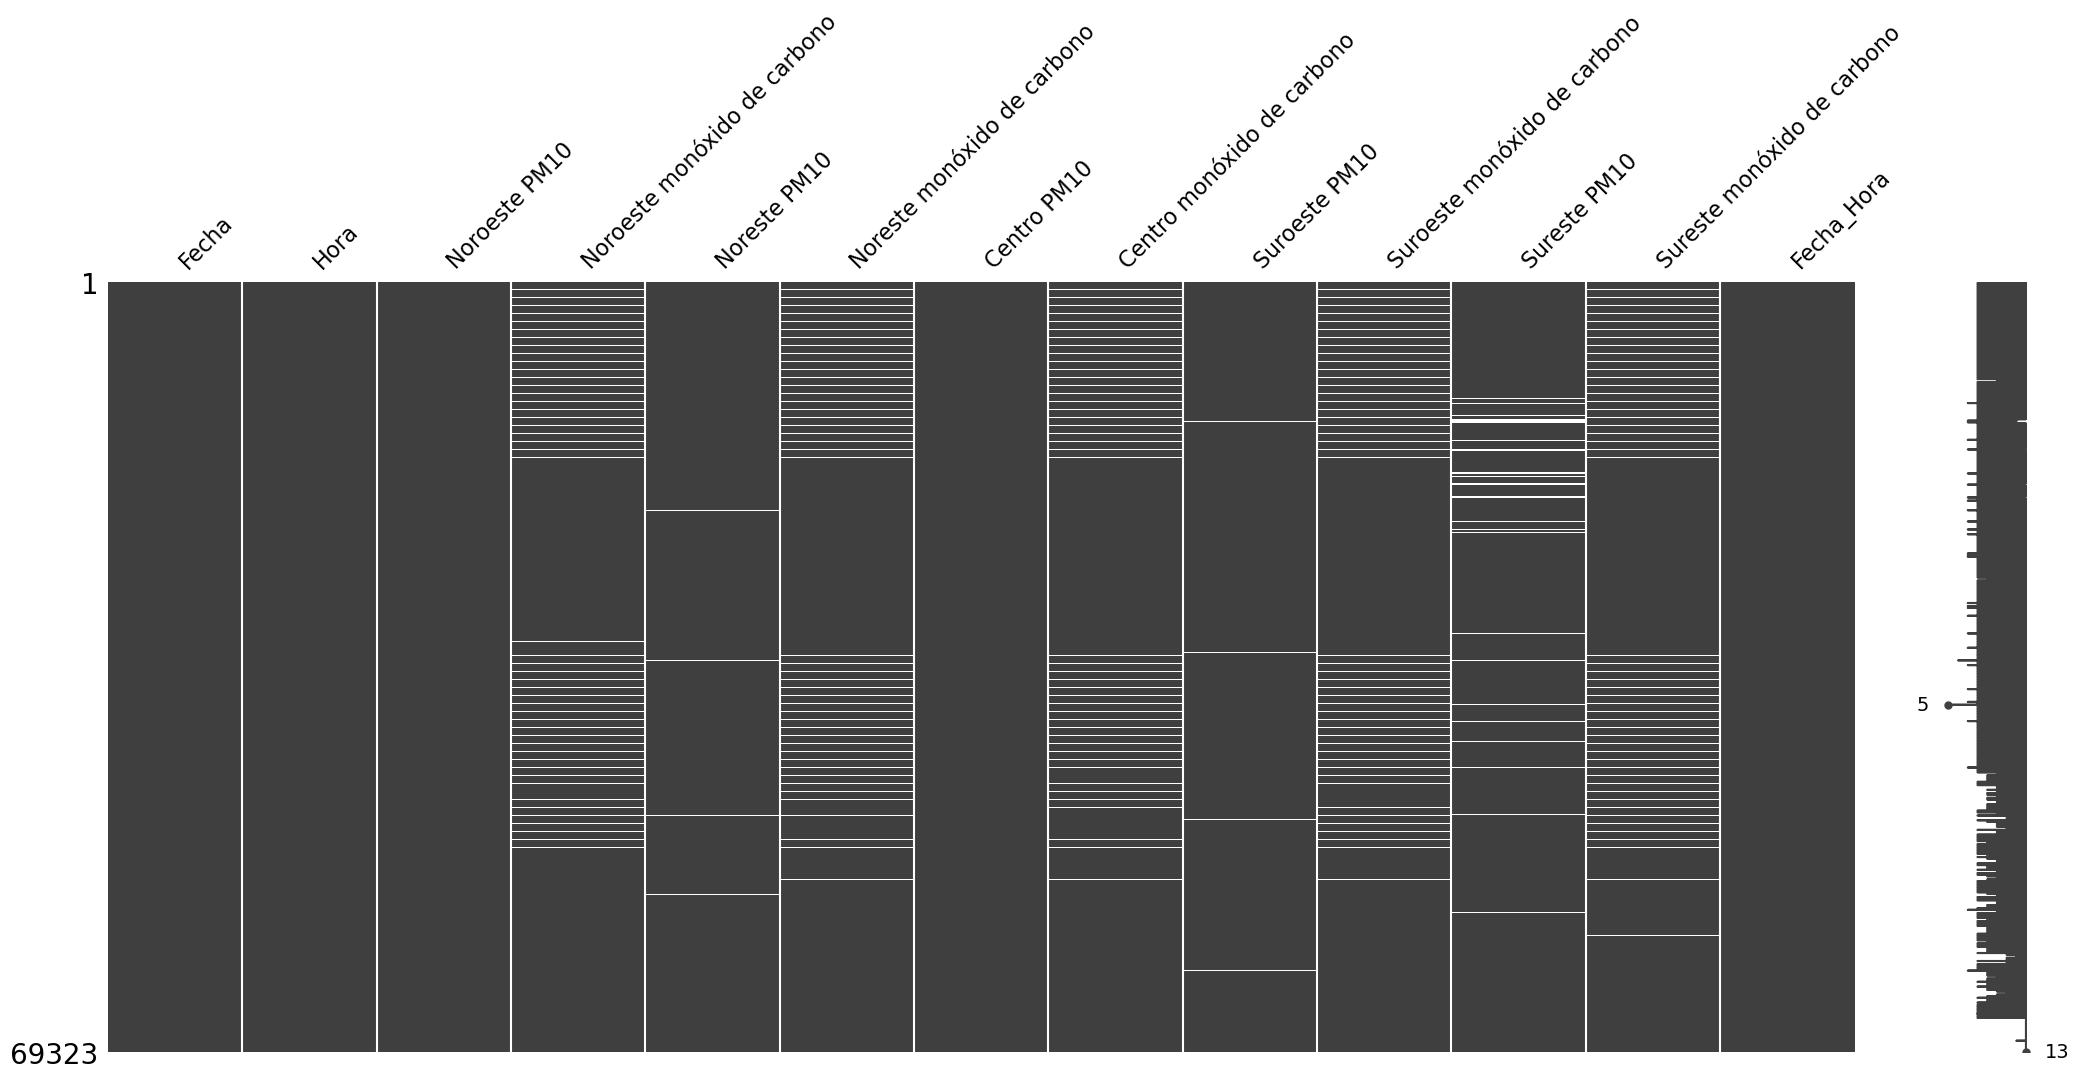

In [68]:
msno.matrix(df)

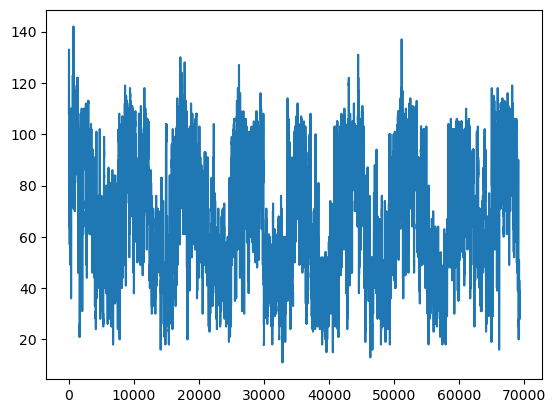

In [59]:
plt.plot(df.index,df['Noroeste PM10'])

In [57]:
df

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono,Fecha_Hora
0,2016-01-01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0,2016-01-01 00:00:00
1,2016-01-01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0,2016-01-01 01:00:00
2,2016-01-01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0,2016-01-01 02:00:00
3,2016-01-01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0,2016-01-01 03:00:00
4,2016-01-01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0,2016-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69318,2024-06-29,12,39.0,8.0,39.0,7.0,35.0,8.0,23.0,7.0,26.0,6.0,2024-06-29 12:00:00
69319,2024-06-29,13,39.0,8.0,39.0,7.0,35.0,8.0,23.0,7.0,28.0,6.0,2024-06-29 13:00:00
69320,2024-06-29,14,39.0,7.0,39.0,6.0,35.0,7.0,23.0,6.0,28.0,6.0,2024-06-29 14:00:00
69321,2024-06-29,15,36.0,6.0,39.0,6.0,35.0,7.0,24.0,6.0,28.0,5.0,2024-06-29 15:00:00


In [21]:
df_comb

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
0,01/01/2016,1,108,13.0,117,16.0,107,16.0,67,9.0,107.0,11.0
1,01/01/2016,2,110,13.0,122,18.0,107,17.0,70,9.0,107.0,12.0
2,01/01/2016,3,113,14.0,124,19.0,109,18.0,76,10.0,108.0,13.0
3,01/01/2016,4,115,14.0,126,19.0,110,19.0,83,10.0,107.0,14.0
4,01/01/2016,5,116,15.0,127,20.0,112,17.0,90,11.0,108.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69318,29/06/2024,13,39,8.0,39,7.0,35,8.0,23,7.0,26.0,6.0
69319,29/06/2024,14,39,8.0,39,7.0,35,8.0,23,7.0,28.0,6.0
69320,29/06/2024,15,39,7.0,39,6.0,35,7.0,23,6.0,28.0,6.0
69321,29/06/2024,16,36,6.0,39,6.0,35,7.0,24,6.0,28.0,5.0


In [17]:
dataframes

[           Fecha  Hora  Noroeste PM10  Noroeste monóxido de carbono  \
 0     01/01/2024     1             87                          14.0   
 1     01/01/2024     2             94                          15.0   
 2     01/01/2024     3            101                          15.0   
 3     01/01/2024     4            105                          16.0   
 4     01/01/2024     5            107                          16.0   
 ...          ...   ...            ...                           ...   
 4326  29/06/2024    13             39                           8.0   
 4327  29/06/2024    14             39                           8.0   
 4328  29/06/2024    15             39                           7.0   
 4329  29/06/2024    16             36                           6.0   
 4330  29/06/2024    17             34                           6.0   
 
       Noreste PM10  Noreste monóxido de carbono  Centro PM10  \
 0              102                         14.0           70   
 1  

In [6]:
data_2024.head(10)

,Fecha,Hora,Noroeste ozono,Noroeste dióxido de azufre,Noroeste dióxido de nitrógeno,Noroeste monóxido de carbono,Noroeste PM10,Noroeste PM25,Noreste ozono,Noreste dióxido de azufre,...,Suroeste dióxido de nitrógeno,Suroeste monóxido de carbono,Suroeste PM10,Suroeste PM25,Sureste ozono,Sureste dióxido de azufre,Sureste dióxido de nitrógeno,Sureste monóxido de carbono,Sureste PM10,Sureste PM25
0,01/01/2024,1,16.0,14,20.0,14.0,87,78.0,15.0,8,...,15.0,11.0,38,64,21.0,4,21.0,15.0,71.0,77
1,01/01/2024,2,9.0,14,20.0,15.0,94,82.0,10.0,8,...,14.0,11.0,40,67,11.0,4,20.0,15.0,77.0,85
2,01/01/2024,3,9.0,12,19.0,15.0,101,87.0,4.0,8,...,16.0,12.0,40,67,5.0,6,21.0,16.0,81.0,94
3,01/01/2024,4,12.0,12,19.0,16.0,105,89.0,5.0,10,...,14.0,12.0,45,70,4.0,6,20.0,17.0,97.0,106
4,01/01/2024,5,11.0,12,18.0,16.0,107,91.0,5.0,10,...,12.0,12.0,50,70,6.0,6,19.0,17.0,103.0,117
5,01/01/2024,6,12.0,12,17.0,16.0,110,96.0,5.0,10,...,11.0,12.0,52,75,6.0,6,18.0,18.0,105.0,124
6,01/01/2024,7,11.0,12,16.0,16.0,112,101.0,4.0,10,...,11.0,12.0,55,79,4.0,6,17.0,20.0,108.0,132
7,01/01/2024,8,14.0,12,14.0,15.0,113,104.0,4.0,10,...,11.0,12.0,57,83,5.0,6,17.0,22.0,111.0,139
8,01/01/2024,9,16.0,12,15.0,15.0,115,106.0,9.0,10,...,12.0,11.0,58,88,8.0,6,20.0,22.0,113.0,146
9,01/01/2024,10,23.0,12,16.0,15.0,116,107.0,22.0,10,...,19.0,11.0,58,91,21.0,6,23.0,22.0,116.0,153


In [5]:
data_2024.shape

(4331, 32)

In [69]:
def plot_time_series(df, variable, zones, ylabel, title, start_date=None, end_date=None):
    plt.figure(figsize=(15, 5))
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    for zone in zones:
        column = f"{zone}-{variable}"
        if column in df.columns:
            plt.plot(df.index, df[column], label=column)
        else:
            print(f"Columna {column} no encontrada en el DataFrame")
    plt.xlabel('Fecha_Hora')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Columna NO-PM10 no encontrada en el DataFrame


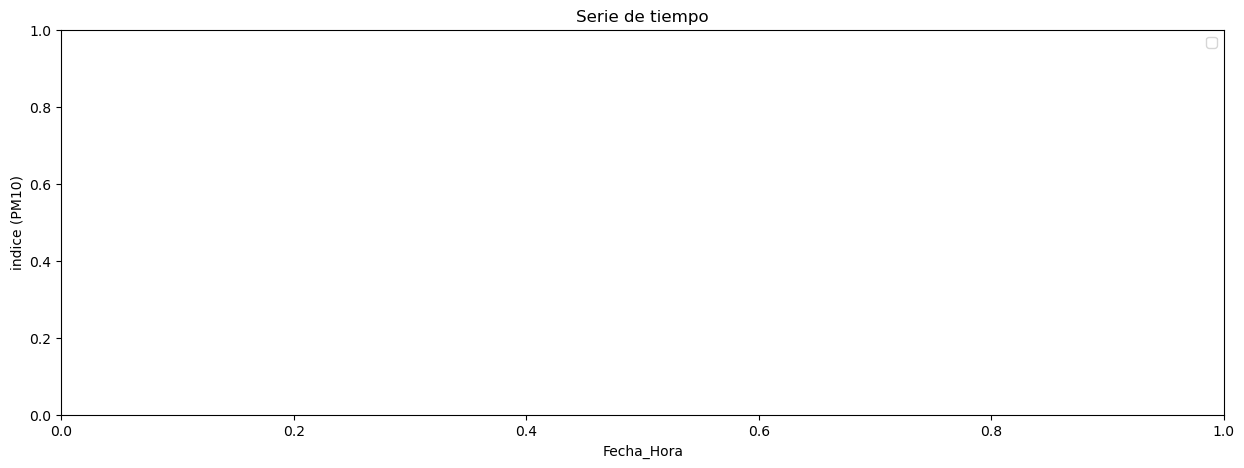

In [72]:
plot_time_series(df,'PM10', ['NO'], 'indice (PM10)','Serie de tiempo', start_date='2016-01-01', end_date='2016-12-30')
plt.show()